### Because of the weak causality in the Granger Causality Test, let's explore the correlational relationship between three time series objects

In [1]:
import pandas as pd

twitter_d = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/time series/ts_day_tweet.csv', index_col=0, parse_dates=True)
twitter_w = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/time series/ts_week_tweet.csv', index_col=0, parse_dates=True)
google_d_old = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/time series/ts_day_google_old.csv', index_col=0, parse_dates=True)
google_d_new = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/time series/ts_day_google_new.csv', index_col=0, parse_dates=True)
google_w_old = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/time series/ts_week_google_old.csv', index_col=0, parse_dates=True)
google_w_new = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/time series/ts_week_google_new.csv', index_col=0, parse_dates=True)
crime_w = pd.read_csv('/Users/itsyuzhou/Spring2023/MACS30200/replication-materials-yuzhouw313/time series/ts_week_crime.csv', index_col=0, parse_dates=True)

## Daily Time Series Ordinary Least Squares (OLS) Analysis

Since the daily Twitter time series is non-stationary, let's difference all daily time series objects for consistency

In [2]:
twitter_d_diff = twitter_d.diff().dropna()
google_d_old_diff = google_d_old.diff().dropna()
google_d_new_diff = google_d_new.diff().dropna()

In [9]:
daily_data = pd.concat([twitter_d_diff, google_d_old_diff, google_d_new_diff], axis=1)
daily_data = daily_data.set_axis(['twitter', 'google_old', 'google_new'], axis=1)
daily_data

,twitter,google_old,google_new
2020-01-02,103.0,1.0,0.5
2020-01-03,148.0,-18.0,0.0
2020-01-04,-89.0,0.0,0.0
2020-01-05,-108.0,-6.0,0.0
2020-01-06,-30.0,10.0,0.5
...,...,...,...
2020-12-27,88.0,-19.0,3.0
2020-12-28,-31.0,27.0,-2.0
2020-12-29,12.0,21.0,3.0
2020-12-30,-27.0,-16.0,1.0


In [26]:
import statsmodels.api as sm

### Google Old vs. Twitter

In [27]:
# Define predictor and response variables
y = daily_data['twitter']
x = daily_data['google_old']

# Add constant to predictor variables
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                twitter   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.492
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.223
Time:                        10:02:24   Log-Likelihood:                -2129.0
No. Observations:                 365   AIC:                             4262.
Df Residuals:                     363   BIC:                             4270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4051      4.335      0.093      0.9

changes in Twitter trend = 0.4051 - 0.2653 * (changes in Google old trend)

- The coefficient for the "google_old" variable is -0.2653. This means that for every unit increase in the "google_old" variable, the "twitter" variable is expected to decrease by approximately 0.2653 units.
- The p-value associated with the coefficient is 0.223. Since this p-value is greater than the commonly used significance level of 0.05, we do not have enough evidence to conclude that there is a statistically significant relationship between the "google_old" variable and the "twitter" variable.
- The R-squared value is 0.004, indicating that only 0.4% of the variation in the "twitter" variable can be explained by the "google_old" variable. This suggests a very weak relationship between the two variables.

Text(0, 0.5, 'Twitter Trend Changes')

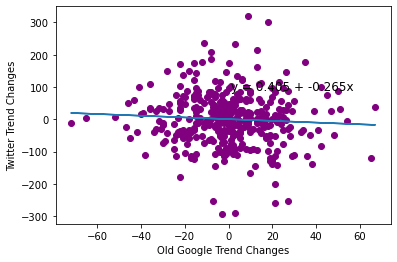

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Find line of best fit
a, b = np.polyfit(daily_data['google_old'], daily_data['twitter'], 1)

#add points to plot
plt.scatter(daily_data['google_old'], daily_data['twitter'], color='purple')

#add line of best fit to plot
plt.plot(daily_data['google_old'], a*daily_data['google_old']+b)

#add fitted regression equation to plot
plt.text(1, 90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

#add axis labels
plt.xlabel('Old Google Trend Changes')
plt.ylabel('Twitter Trend Changes')

In [29]:
x = daily_data['twitter']
y = daily_data['google_old']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             google_old   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.492
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.223
Time:                        10:12:03   Log-Likelihood:                -1609.8
No. Observations:                 365   AIC:                             3224.
Df Residuals:                     363   BIC:                             3231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0156      1.045     -0.015      0.9

- The coefficient for the "twitter" variable is -0.0154. This means that for every unit increase in the "twitter" variable, the "google_old" variable is expected to decrease by approximately 0.0154 units.
- The p-value associated with the coefficient is 0.223. Since this p-value is greater than the commonly used significance level of 0.05, we do not have enough evidence to conclude that there is a statistically significant relationship between the "twitter" variable and the "google_old" variable.
- The R-squared value is 0.004, indicating that only 0.4% of the variation in the "google_old" variable can be explained by the "twitter" variable. This suggests a very weak relationship between the two variables.

Text(0.5, 0, 'Twitter Trend Changes')

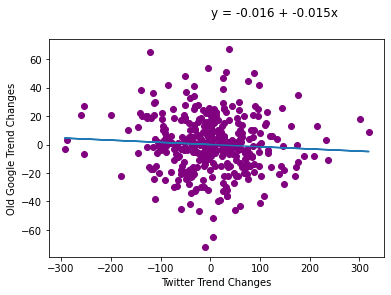

In [30]:
a, b = np.polyfit(daily_data['twitter'], daily_data['google_old'], 1)

plt.scatter(daily_data['twitter'], daily_data['google_old'], color='purple')

plt.plot(daily_data['twitter'], a*daily_data['twitter']+b)

plt.text(1, 90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.ylabel('Old Google Trend Changes')
plt.xlabel('Twitter Trend Changes')

### Google New vs. Twitter

In [31]:
y = daily_data['twitter']
x = daily_data['google_new']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                twitter   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2255
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.635
Time:                        10:44:46   Log-Likelihood:                -2129.6
No. Observations:                 365   AIC:                             4263.
Df Residuals:                     363   BIC:                             4271.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4030      4.343      0.093      0.9

- The coefficient for the "google_new" variable is 0.2892. This means that for every unit increase in the "google_new" variable, the "twitter" variable is expected to increase by approximately 0.2892 units.
- The p-value associated with the coefficient is 0.635. Since this p-value is greater than the commonly used significance level of 0.05, we do not have enough evidence to conclude that there is a statistically significant relationship between the "google_new" variable and the "twitter" variable.
- The R-squared value is 0.001, indicating that only 0.1% of the variation in the "twitter" variable can be explained by the "google_new" variable. This suggests a very weak relationship between the two variables.

Text(0, 0.5, 'Twitter Trend Changes')

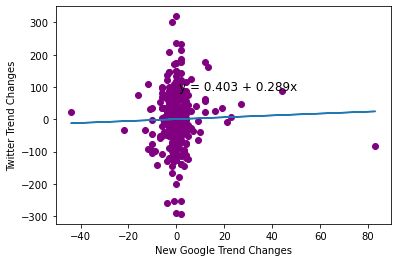

In [32]:
a, b = np.polyfit(daily_data['google_new'], daily_data['twitter'], 1)

plt.scatter(daily_data['google_new'], daily_data['twitter'], color='purple')

plt.plot(daily_data['google_new'], a*daily_data['google_new']+b)

plt.text(1, 90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.xlabel('New Google Trend Changes')
plt.ylabel('Twitter Trend Changes')

In [33]:
x = daily_data['twitter']
y = daily_data['google_new']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             google_new   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2255
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.635
Time:                        10:47:19   Log-Likelihood:                -1234.8
No. Observations:                 365   AIC:                             2474.
Df Residuals:                     363   BIC:                             2481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0265      0.374      0.071      0.9

- The coefficient for the "twitter" variable is 0.0021. This means that for every unit increase in the "twitter" variable, the "google_new" variable is expected to increase by approximately 0.0021 units.
- The p-value associated with the coefficient is 0.635. Since this p-value is greater than the commonly used significance level of 0.05, we do not have enough evidence to conclude that there is a statistically significant relationship between the "twitter" variable and the "google_new" variable.
- The R-squared value is 0.001, indicating that only 0.1% of the variation in the "google_new" variable can be explained by the "twitter" variable. This suggests a very weak relationship between the two variables.

Text(0.5, 0, 'Twitter Trend Changes')

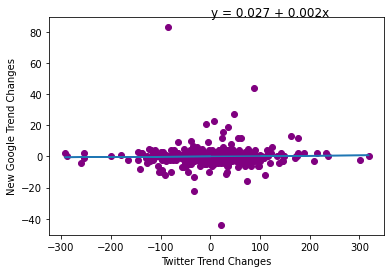

In [34]:
a, b = np.polyfit(daily_data['twitter'], daily_data['google_new'], 1)

plt.scatter(daily_data['twitter'], daily_data['google_new'], color='purple')

plt.plot(daily_data['twitter'], a*daily_data['twitter']+b)

plt.text(1, 90, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.ylabel('New Google Trend Changes')
plt.xlabel('Twitter Trend Changes')

## Weekly Time Series Ordinary Least Squares (OLS) Analysis

In [35]:
weekly_data = pd.concat([twitter_w, google_w_old, google_w_new, crime_w], axis=1)
weekly_data = weekly_data.set_axis(['twitter', 'google_old', 'google_new', 'crime'], axis=1)

,twitter,google_old,google_new,crime
2020-01-05,2024.0,47.800000,0.400000,2
2020-01-12,1997.0,39.857143,0.785714,4
2020-01-19,1826.0,43.857143,2.642857,3
2020-01-26,2066.0,52.142857,67.285714,2
2020-02-02,1846.0,51.714286,53.571429,10
2020-02-09,1559.0,43.714286,23.428571,3
2020-02-16,1580.0,39.142857,16.428571,2
2020-02-23,1767.0,38.714286,11.285714,3
2020-03-01,1786.0,43.000000,16.428571,4
2020-03-08,1678.0,50.857143,15.857143,3


In [36]:
weekly_data = weekly_data.fillna(weekly_data.mean())

In [37]:
weekly_data

,twitter,google_old,google_new,crime
2020-01-05,2024.000000,47.800000,0.400000,2
2020-01-12,1997.000000,39.857143,0.785714,4
2020-01-19,1826.000000,43.857143,2.642857,3
2020-01-26,2066.000000,52.142857,67.285714,2
2020-02-02,1846.000000,51.714286,53.571429,10
2020-02-09,1559.000000,43.714286,23.428571,3
2020-02-16,1580.000000,39.142857,16.428571,2
2020-02-23,1767.000000,38.714286,11.285714,3
2020-03-01,1786.000000,43.000000,16.428571,4
2020-03-08,1678.000000,50.857143,15.857143,3


### Twitter vs. Crime

In [38]:
x = weekly_data['twitter']
y = weekly_data['crime']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     7.809
Date:                Thu, 25 May 2023   Prob (F-statistic):            0.00731
Time:                        10:52:36   Log-Likelihood:                -148.15
No. Observations:                  53   AIC:                             300.3
Df Residuals:                      51   BIC:                             304.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8228      3.106     -0.587      0.5

- The coefficient for the "twitter" variable is 0.0034. This means that for every unit increase in the "twitter" variable, the "crime" variable is expected to increase by approximately 0.0034 units.
- The p-value associated with the coefficient is 0.007, which is less than the commonly used significance level of 0.05. This indicates that there is a statistically significant relationship between the "twitter" variable and the "crime" variable.
- The R-squared value is 0.133, suggesting that approximately 13.3% of the variation in the "crime" variable can be explained by the "twitter" variable. This indicates a moderate level of association between the two variables.
- The F-statistic and its associated p-value (0.00731) provide information about the overall significance of the regression model. In this case, since the p-value is less than 0.05, we can conclude that the regression model is statistically significant, indicating that the "twitter" variable is a useful predictor of the "crime" variable.

Text(0.5, 0, 'Weekly Twitter Changes')

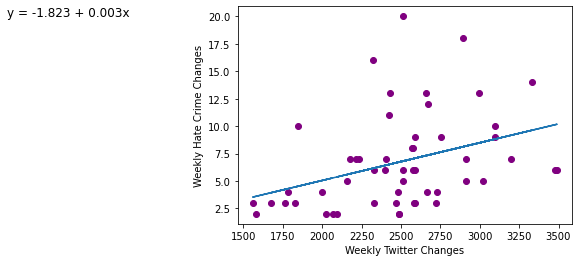

In [71]:
a, b = np.polyfit(weekly_data['twitter'], weekly_data['crime'], 1)

plt.scatter(weekly_data['twitter'], weekly_data['crime'], color='purple')

plt.plot(weekly_data['twitter'], a*weekly_data['twitter']+b)

plt.text(0.5, 20, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.ylabel('Weekly Hate Crime Changes')
plt.xlabel('Weekly Twitter Changes')

In [45]:
y = weekly_data['twitter']
x = weekly_data['crime']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                twitter   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     7.809
Date:                Thu, 25 May 2023   Prob (F-statistic):            0.00731
Time:                        11:01:40   Log-Likelihood:                -395.37
No. Observations:                  53   AIC:                             794.7
Df Residuals:                      51   BIC:                             798.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2226.8791    110.003     20.244      0.0

- The coefficient for the "crime" variable is 38.6657. This means that for every unit increase in the "crime" variable, the "twitter" variable is expected to increase by approximately 38.6657 units.
- The p-value associated with the coefficient is 0.007, which is less than the commonly used significance level of 0.05. This indicates that there is a statistically significant relationship between the "crime" variable and the "twitter" variable.
- The R-squared value is 0.133, suggesting that approximately 13.3% of the variation in the "twitter" variable can be explained by the "crime" variable. This indicates a moderate level of association between the two variables.
- The F-statistic and its associated p-value (0.00731) provide information about the overall significance of the regression model. In this case, since the p-value is less than 0.05, we can conclude that the regression model is statistically significant, indicating that the "crime" variable is a useful predictor of the "twitter" variable.

Text(0.5, 0, 'Weekly Hate Crime Changes')

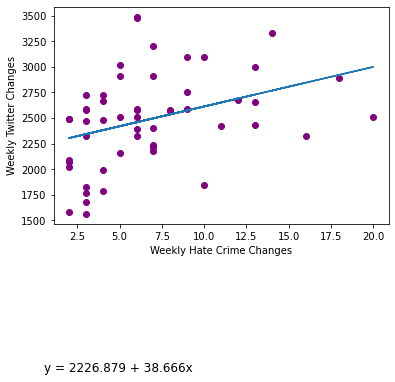

In [72]:
a, b = np.polyfit(weekly_data['crime'], weekly_data['twitter'], 1)

plt.scatter(weekly_data['crime'], weekly_data['twitter'], color='purple')

plt.plot(weekly_data['crime'], a*weekly_data['crime']+b)

plt.text(0.5, 20, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.ylabel('Weekly Twitter Changes')
plt.xlabel('Weekly Hate Crime Changes')

### Google Old vs. Crime

In [52]:
x = weekly_data['google_old']
y = weekly_data['crime']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.002856
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.958
Time:                        11:06:47   Log-Likelihood:                -151.93
No. Observations:                  53   AIC:                             307.9
Df Residuals:                      51   BIC:                             311.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4562      4.916      1.313      0.1

- The coefficient for the "google_old" variable is 0.0051. This means that for every unit increase in the "google_old" variable, the "crime" variable is expected to increase by approximately 0.0051 units.
- The p-value associated with the coefficient is 0.958, which is greater than the commonly used significance level of 0.05. This indicates that there is no statistically significant relationship between the "google_old" variable and the "crime" variable.
- The R-squared value is 0.000, suggesting that the "google_old" variable explains very little (close to zero) of the variation in the "crime" variable. This indicates that there is essentially no association between the two variables.

Text(0, 0.5, 'Weekly Hate Crime Changes')

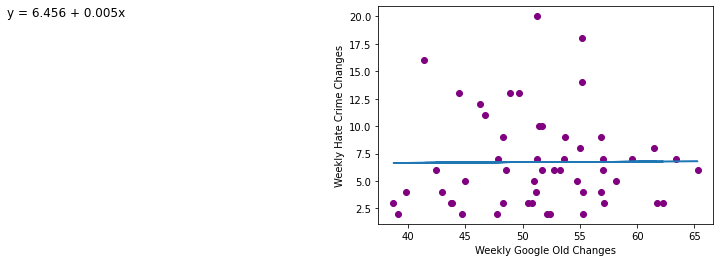

In [67]:
a, b = np.polyfit(weekly_data['google_old'], weekly_data['crime'], 1)

plt.scatter(weekly_data['google_old'], weekly_data['crime'], color='purple')

plt.plot(weekly_data['google_old'], a*weekly_data['google_old']+b)

plt.text(5, 20, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.xlabel('Weekly Google Old Changes')
plt.ylabel('Weekly Hate Crime Changes')

In [56]:
y = weekly_data['google_old']
x = weekly_data['crime']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             google_old   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.002856
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.958
Time:                        11:10:59   Log-Likelihood:                -172.53
No. Observations:                  53   AIC:                             349.1
Df Residuals:                      51   BIC:                             353.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.3338      1.642     31.259      0.0

- The coefficient for the "crime" variable is 0.0110. This means that for every unit increase in the "crime" variable, the "google_old" variable is expected to increase by approximately 0.0110 units.
- The p-value associated with the coefficient is 0.958, which is greater than the commonly used significance level of 0.05. This indicates that there is no statistically significant relationship between the "crime" variable and the "google_old" variable.
- The R-squared value is 0.000, suggesting that the "crime" variable explains very little (close to zero) of the variation in the "google_old" variable. This indicates that there is essentially no association between the two variables.

Text(0.5, 0, 'Weekly Hate Crime Changes')

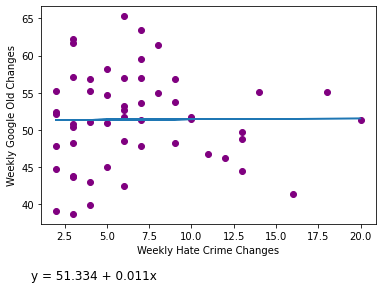

In [65]:
a, b = np.polyfit(weekly_data['crime'], weekly_data['google_old'], 1)

plt.scatter(weekly_data['crime'], weekly_data['google_old'], color='purple')

plt.plot(weekly_data['crime'], a*weekly_data['crime']+b)

plt.text(0.5, 30, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.ylabel('Weekly Google Old Changes')
plt.xlabel('Weekly Hate Crime Changes')

### Google New vs. Crime

In [58]:
x = weekly_data['google_new']
y = weekly_data['crime']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  crime   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.061
Date:                Thu, 25 May 2023   Prob (F-statistic):             0.0862
Time:                        11:14:32   Log-Likelihood:                -150.39
No. Observations:                  53   AIC:                             304.8
Df Residuals:                      51   BIC:                             308.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6035      0.860      6.515      0.0

- The coefficient for the "google_new" variable is 0.0731. This means that for every unit increase in the "google_new" variable, the "crime" variable is expected to increase by approximately 0.0731 units.
- The p-value associated with the coefficient is 0.086, which is close to but slightly greater than the commonly used significance level of 0.05. This suggests that there may be a weakly significant relationship between the "google_new" variable and the "crime" variable, but the evidence is not strong enough to conclude it definitively.
- The R-squared value is 0.057, indicating that the "google_new" variable explains about 5.7% of the variation in the "crime" variable. This suggests a relatively weak relationship between the two variables.

Text(0, 0.5, 'Weekly Hate Crime Changes')

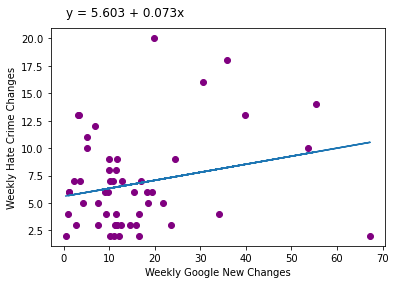

In [63]:
a, b = np.polyfit(weekly_data['google_new'], weekly_data['crime'], 1)

plt.scatter(weekly_data['google_new'], weekly_data['crime'], color='purple')

plt.plot(weekly_data['google_new'], a*weekly_data['google_new']+b)

plt.text(0.5, 22, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.xlabel('Weekly Google New Changes')
plt.ylabel('Weekly Hate Crime Changes')

In [73]:
y = weekly_data['google_new']
x = weekly_data['crime']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             google_new   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     3.061
Date:                Thu, 25 May 2023   Prob (F-statistic):             0.0862
Time:                        11:19:15   Log-Likelihood:                -212.90
No. Observations:                  53   AIC:                             429.8
Df Residuals:                      51   BIC:                             433.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0238      3.517      2.850      0.0

Text(0, 0.5, 'Weekly Hate Crime Changes')

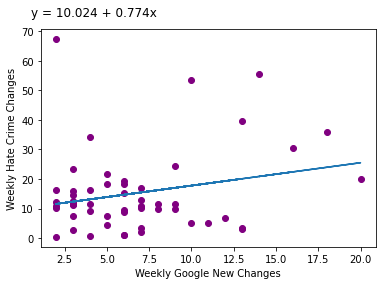

In [78]:
a, b = np.polyfit(weekly_data['crime'], weekly_data['google_new'], 1)

plt.scatter(weekly_data['crime'], weekly_data['google_new'], color='purple')

plt.plot(weekly_data['crime'], a*weekly_data['crime']+b)

plt.text(0.5, 75, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.xlabel('Weekly Google New Changes')
plt.ylabel('Weekly Hate Crime Changes')

### Google vs. Twitter

In [79]:
y = weekly_data['google_new']
x = weekly_data['twitter']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             google_new   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.291
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.261
Time:                        11:22:22   Log-Likelihood:                -213.79
No. Observations:                  53   AIC:                             431.6
Df Residuals:                      51   BIC:                             435.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1995     10.715      2.539      0.0

- R-squared: 0.025, which indicates that only 2.5% of the variance in google_new can be explained by the independent variable.
- The coefficient for the constant term is 27.1995, suggesting that when the independent variable (twitter) is zero, the predicted value for google_new is 27.1995.
- The coefficient for the independent variable (twitter) is -0.0048, indicating that for every unit increase in twitter, the predicted value for google_new decreases by 0.0048.
- The p-value for the t-statistic of the independent variable is 0.261, which is greater than the typical significance level of 0.05. This suggests that the coefficient for twitter is not statistically significant, and we fail to reject the null hypothesis that there is no relationship between twitter and google_new.

In [80]:
x = weekly_data['google_new']
y = weekly_data['twitter']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                twitter   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.291
Date:                Thu, 25 May 2023   Prob (F-statistic):              0.261
Time:                        11:24:37   Log-Likelihood:                -398.48
No. Observations:                  53   AIC:                             801.0
Df Residuals:                      51   BIC:                             804.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2564.6022     92.790     27.639      0.0

In [81]:
y = weekly_data['google_old']
x = weekly_data['twitter']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             google_old   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     6.978
Date:                Thu, 25 May 2023   Prob (F-statistic):             0.0109
Time:                        11:24:57   Log-Likelihood:                -169.14
No. Observations:                  53   AIC:                             342.3
Df Residuals:                      51   BIC:                             346.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.4146      4.614      8.542      0.0

- R-squared: 0.120, which indicates that approximately 12% of the variance in google_old can be explained by the independent variable.
- The coefficient for the independent variable (twitter) is 0.0048, indicating that for every unit increase in twitter, the predicted value for google_old increases by 0.0048.
- The p-value for the t-statistic of the independent variable is 0.011, which is smaller than the typical significance level of 0.05. This suggests that the coefficient for twitter is statistically significant, and we can reject the null hypothesis that there is no relationship between twitter and google_old.
- Overall, the model suggests that there is a statistically significant positive relationship between twitter and google_old. However, the R-squared value indicates that there is still a considerable amount of unexplained variance in google_old.

Text(0, 0.5, 'Weekly Google old Changes')

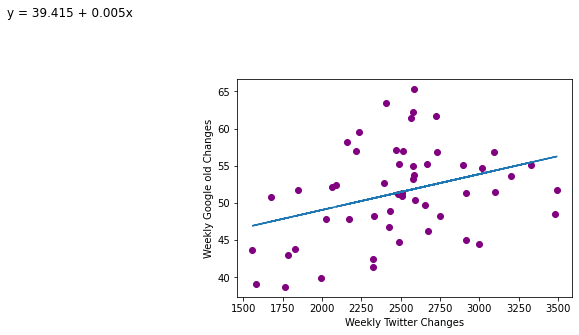

In [83]:
a, b = np.polyfit(weekly_data['twitter'], weekly_data['google_old'], 1)

plt.scatter(weekly_data['twitter'], weekly_data['google_old'], color='purple')

plt.plot(weekly_data['twitter'], a*weekly_data['twitter']+b)

plt.text(2, 75, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.xlabel('Weekly Twitter Changes')
plt.ylabel('Weekly Google old Changes')

In [84]:
x = weekly_data['google_old']
y = weekly_data['twitter']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                twitter   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     6.978
Date:                Thu, 25 May 2023   Prob (F-statistic):             0.0109
Time:                        11:28:11   Log-Likelihood:                -395.75
No. Observations:                  53   AIC:                             795.5
Df Residuals:                      51   BIC:                             799.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1203.8061    489.221      2.461      0.0

Text(0.5, 0, 'Weekly Google old Changes')

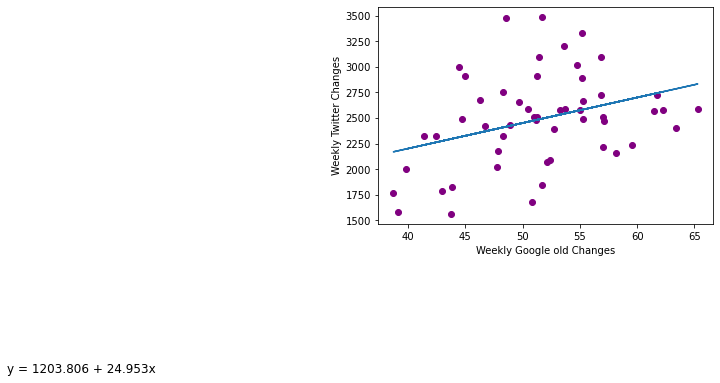

In [87]:
a, b = np.polyfit(weekly_data['google_old'], weekly_data['twitter'], 1)

plt.scatter(weekly_data['google_old'], weekly_data['twitter'], color='purple')

plt.plot(weekly_data['google_old'], a*weekly_data['google_old']+b)

plt.text(5, 10, 'y = ' + '{:.3f}'.format(b) + ' + {:.3f}'.format(a) + 'x', size=12)

plt.ylabel('Weekly Twitter Changes')
plt.xlabel('Weekly Google old Changes')